# Taller 5 - Archivo de soporte

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import setuptools.dist # necesario en versión 3.12 de python
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Identificamos NAs en los datos

In [3]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.shape

(392, 8)

In [6]:
df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: object

In [7]:
df['Origin'] = df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [8]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [9]:
pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


In [10]:
df = pd.get_dummies(df, columns=['Origin'], prefix='', prefix_sep='', dtype=int)

In [11]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [12]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,20.0,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,26.0,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,31.5,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,20.2,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,30.0,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [13]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1


In [36]:
print(train.shape)
print(test.shape)

(314, 10)
(78, 10)


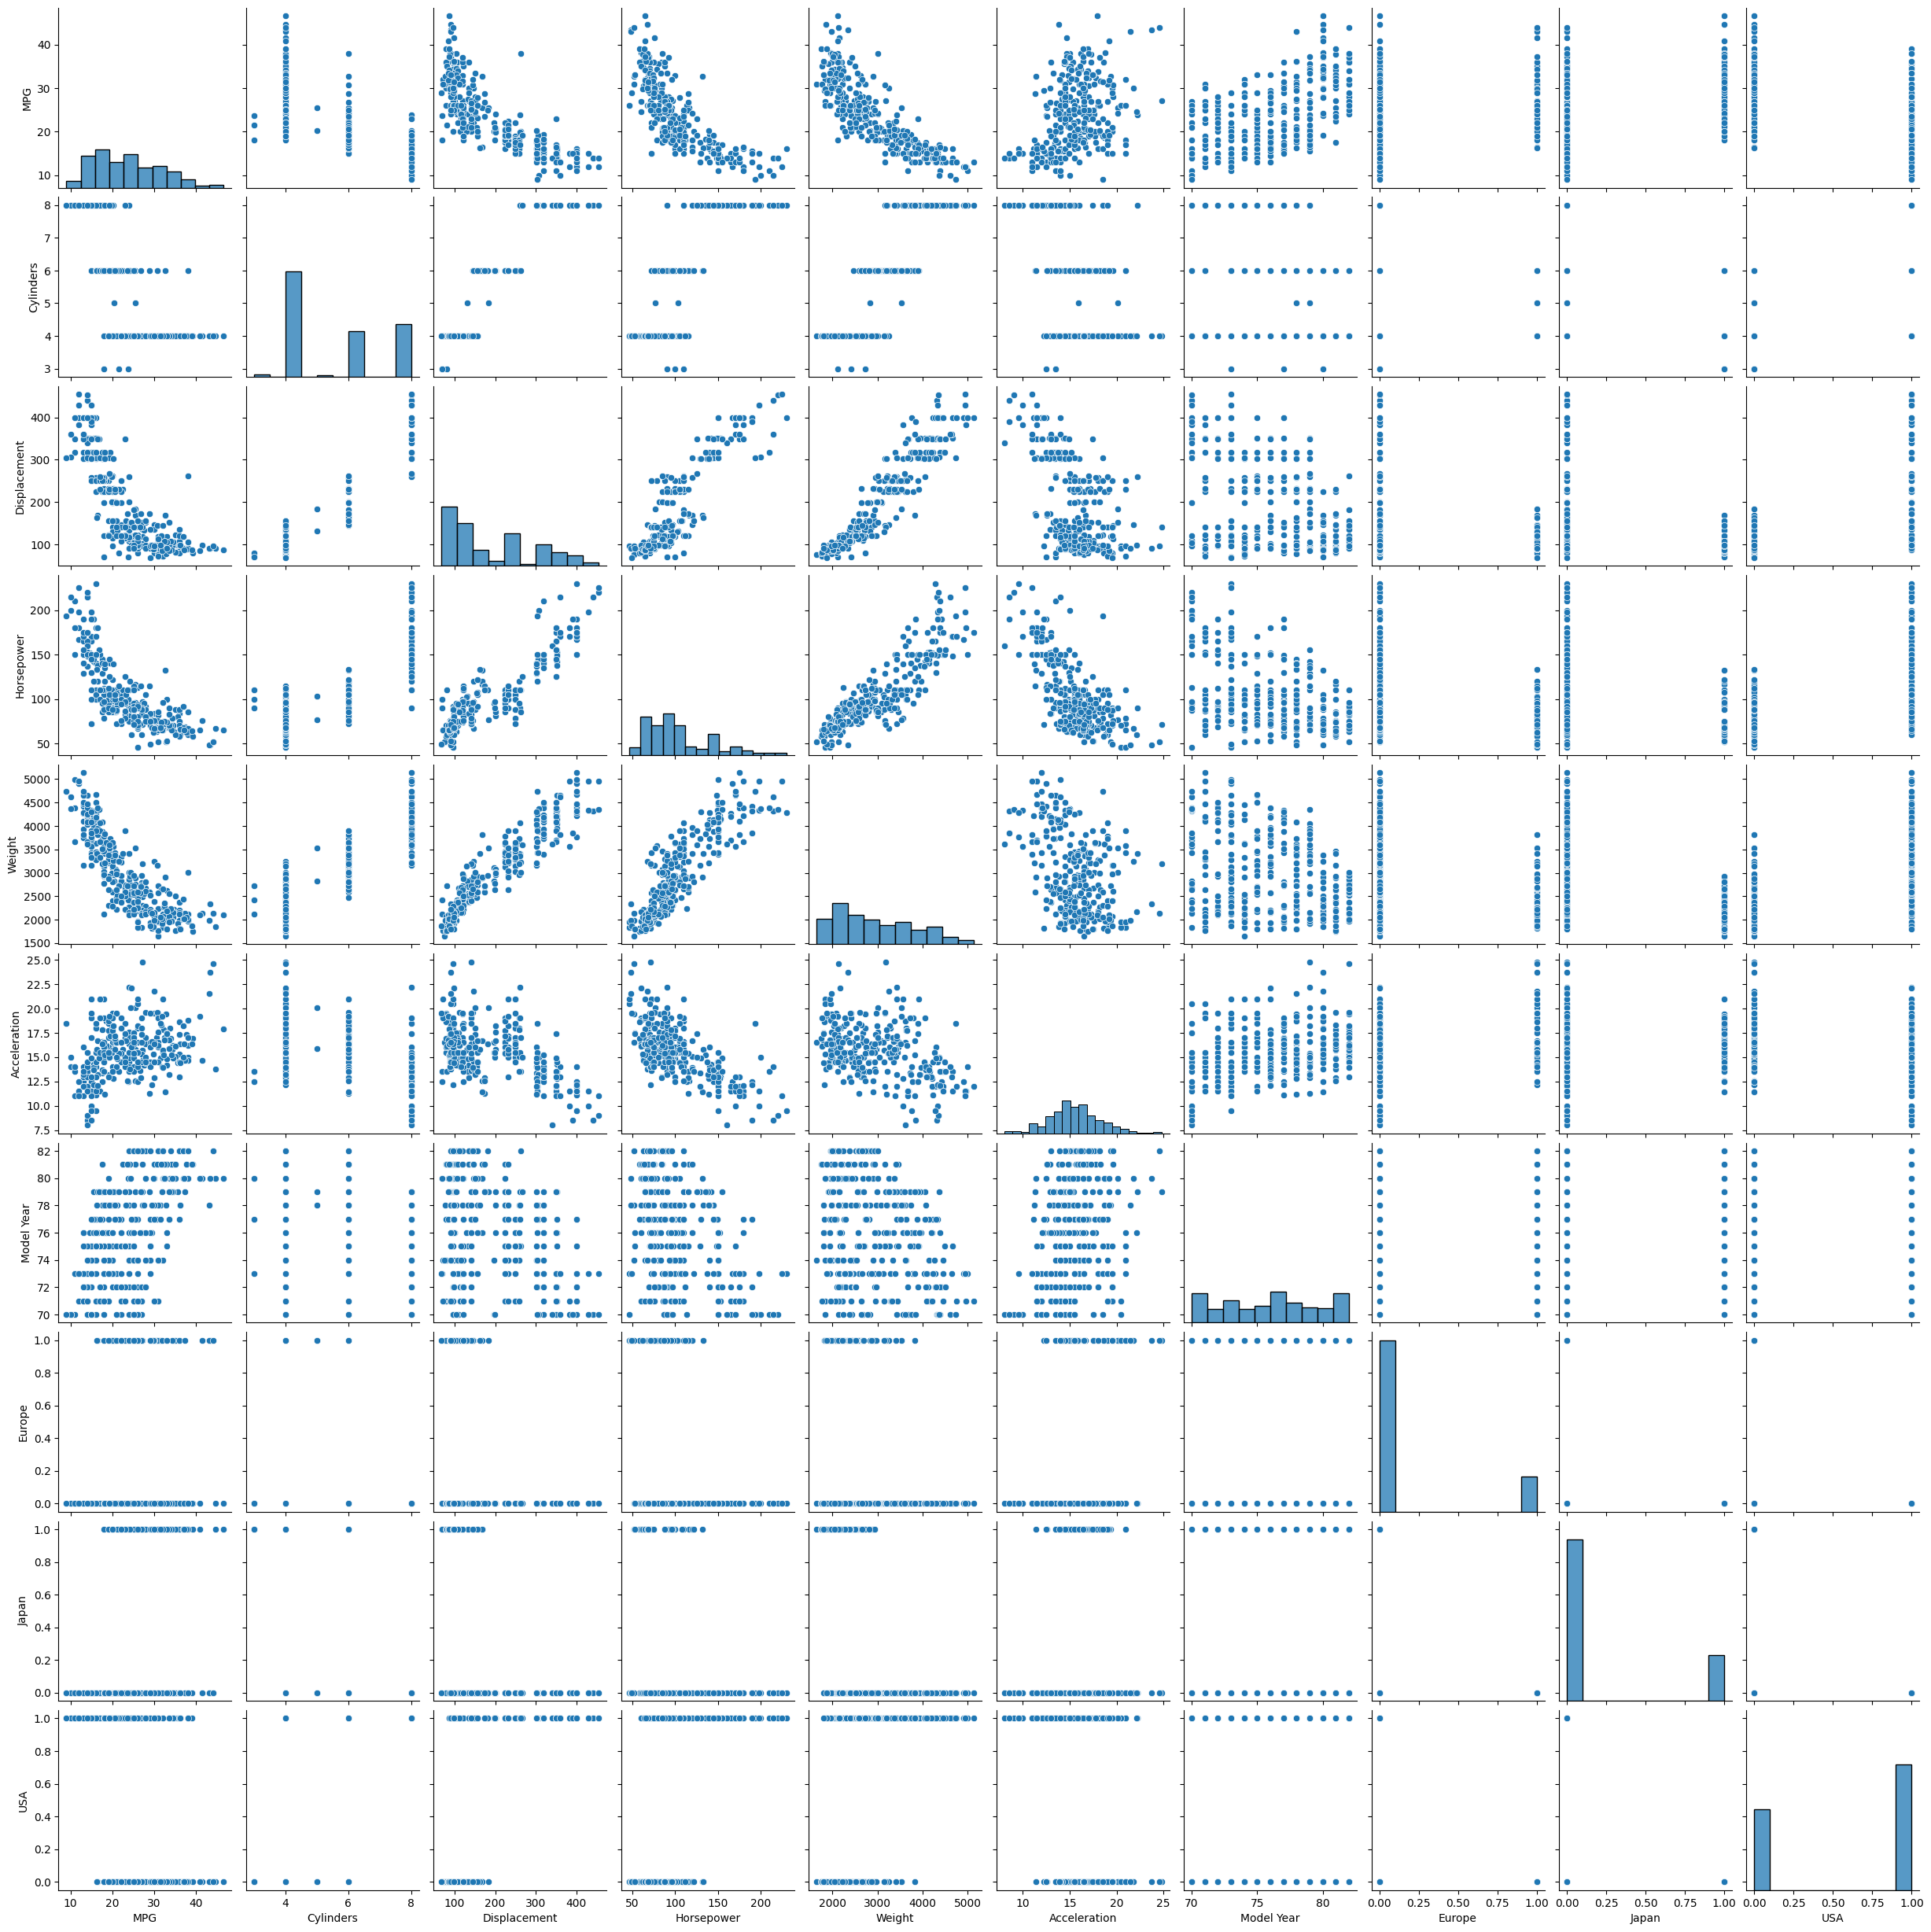

In [37]:
sns.pairplot(train)

<Axes: >

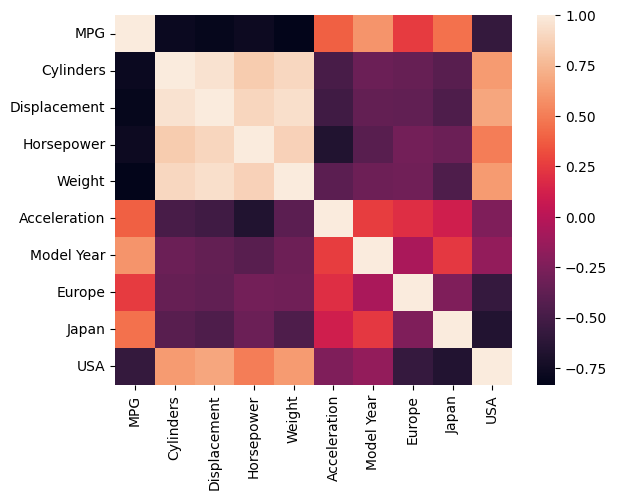

In [38]:
sns.heatmap(train.corr())

In [14]:
train_X = train.copy()
test_X = test.copy()

In [15]:
train_y = train_X.pop('MPG')
test_y = test_X.pop('MPG')

In [16]:
train_X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1
142,4,79.0,67.0,1963.0,15.5,74,1,0,0
278,4,89.0,71.0,1990.0,14.9,78,1,0,0
254,6,200.0,85.0,2965.0,15.8,78,0,0,1
328,4,146.0,67.0,3250.0,21.8,80,1,0,0


In [17]:
train_y.head()

125    20.0
142    26.0
278    31.5
254    20.2
328    30.0
Name: MPG, dtype: float64

In [18]:
train_X.dtypes

Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Europe            int64
Japan             int64
USA               int64
dtype: object

In [19]:
tf.__version__

'2.18.0'

In [20]:
norm = tf.keras.layers.Normalization()

In [21]:
norm.adapt(np.array(train_X))

In [22]:
norm.mean.numpy()

array([[5.4554138e+00, 1.9256210e+02, 1.0376752e+02, 2.9593120e+03,
        1.5518472e+01, 7.5964966e+01, 1.7197452e-01, 2.1974522e-01,
        6.0828024e-01]], dtype=float32)

In [23]:
norm.variance.numpy()

array([[2.8531077e+00, 1.0719739e+04, 1.4487772e+03, 7.3190656e+05,
        7.2942448e+00, 1.3441448e+01, 1.4239928e-01, 1.7145726e-01,
        2.3827539e-01]], dtype=float32)

In [24]:
np.sqrt(norm.variance.numpy())

array([[1.6891145e+00, 1.0353617e+02, 3.8062805e+01, 8.5551538e+02,
        2.7007859e+00, 3.6662581e+00, 3.7735829e-01, 4.1407397e-01,
        4.8813459e-01]], dtype=float32)

In [25]:
train_X[:1]

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
125,6,198.0,95.0,3102.0,16.5,74,0,0,1


In [26]:
norm(train_X[:1]).numpy()

array([[ 0.32240927,  0.05252171, -0.23034343,  0.166786  ,  0.36342323,
        -0.5359595 , -0.45573273, -0.5306907 ,  0.8024831 ]],
      dtype=float32)

## Modelos Base

In [35]:
Variables_exp = ["Model Year","Acceleration","Cylinders","Horsepower"]

norm = tf.keras.layers.Normalization(input_shape=[4,], axis=None)
norm.adapt(np.array(train_X[Variables_exp]))

c:\Users\Esteban\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Modelo multicapa con activación ReLU

In [36]:
Base_h_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(16, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [37]:
Base_h_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [38]:
Base_h_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_5 (Normalization) │ (None, 4)              │             3 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100 (404.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 3 (16.00 B)

In [52]:
from tensorflow.keras.utils import plot_model

plot_model(Base_h_model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [39]:
%%time
history = Base_h_model.fit(
    train_X[Variables_exp],
    train_y,
    validation_split=0.2,
    epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 24.2171 - val_loss: 23.0147
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 24.2924 - val_loss: 22.9182
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 24.2915 - val_loss: 22.8278
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 24.4062 - val_loss: 22.7470
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 23.8849 - val_loss: 22.6747
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 24.0462 - val_loss: 22.6082
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23.7362 - val_loss: 22.5450
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23.7872 - val_loss: 22.4847
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 23.6546 - val_loss: 22.4263
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 23.6799 - val_loss: 22.3695
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 23.7814 - val_loss: 22.3139
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step -

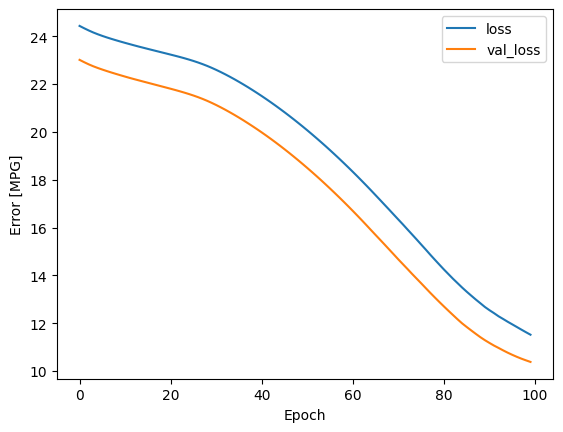

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
x = tf.linspace(0.0, 250, 251)
y = Base_h_model.predict(x)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


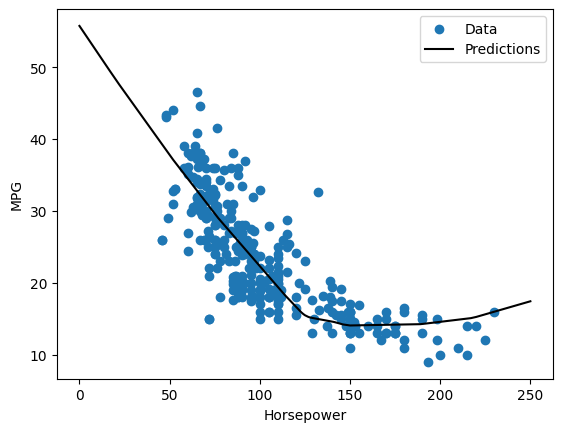

In [59]:
plt.scatter(train_X['Horsepower'], train_y, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [ ]:
test_res['dnn_h_model'] = Base_h_model.evaluate(
    test_X['Horsepower'], test_y,
    verbose=0)

In [61]:
test_res

{'h_model': 3.6799230575561523, 'dnn_h_model': 3.073607921600342}

## Modelo con múltiples variables de entrada

In [62]:
linear_model = tf.keras.Sequential([
    norm,
    tf.keras.layers.Dense(units=1)
])

In [63]:
linear_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (314, 9)               │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [64]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [65]:
%%time
history = linear_model.fit(
    train_X,
    train_y,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 24.0694 - val_loss: 22.0309
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.1449 - val_loss: 21.5067
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.1737 - val_loss: 20.8799
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.9799 - val_loss: 20.2122
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 20.1989 - val_loss: 19.6144
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.3458 - val_loss: 19.0128
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.8223 - val_loss: 18.3892
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.5557 - val_loss: 17.8282
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.9736 - val_loss: 17.1986
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.2608 - val_loss: 16.5020
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.0839 - val_loss: 15.9600
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - l

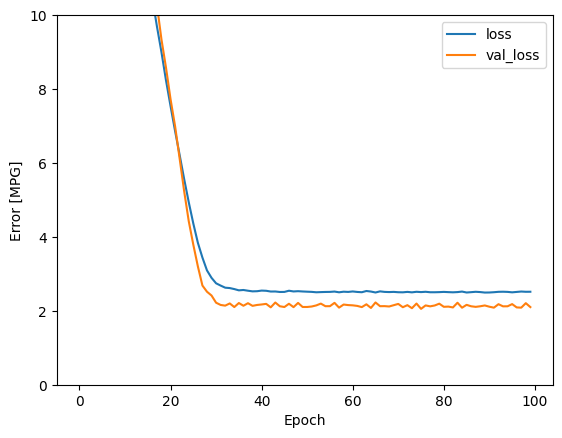

In [66]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [67]:
test_res['linear_model'] = linear_model.evaluate(
    test_X, test_y, verbose=0)

In [68]:
test_res

{'h_model': 3.6799230575561523,
 'dnn_h_model': 3.073607921600342,
 'linear_model': 2.5887346267700195}

In [69]:
dnn_model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
  ])

In [70]:
dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [71]:
dnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [72]:
%%time
history = dnn_model.fit(
  train_X,
  train_y,
  validation_split=0.2,
  epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 23.2283 - val_loss: 21.7220
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.0349 - val_loss: 20.9835
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 21.9800 - val_loss: 20.1184
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 21.2877 - val_loss: 19.0261
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 19.9934 - val_loss: 17.6130
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.0309 - val_loss: 15.8282
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 16.3149 - val_loss: 13.9007
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.4279 - val_loss: 12.0891
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9928 - val_loss: 9.8925
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.6440 - val_loss: 7.3812
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.7255 - val_loss: 6.2628
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss:

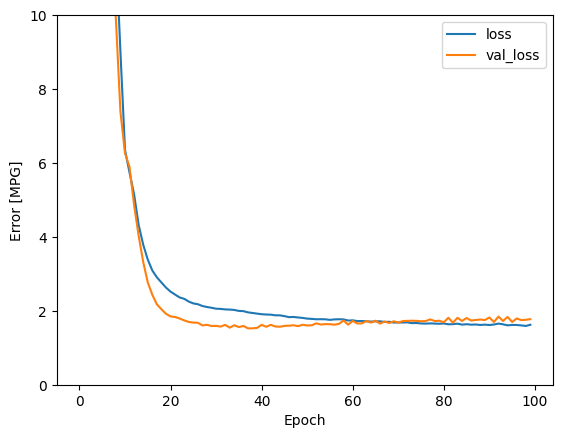

In [73]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [ ]:
test_res['dnn_model'] = dnn_model.evaluate(test_X, test_y, verbose=0)

In [75]:
test_res

{'h_model': 3.6799230575561523,
 'dnn_h_model': 3.073607921600342,
 'linear_model': 2.5887346267700195,
 'dnn_model': 2.0703141689300537}

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


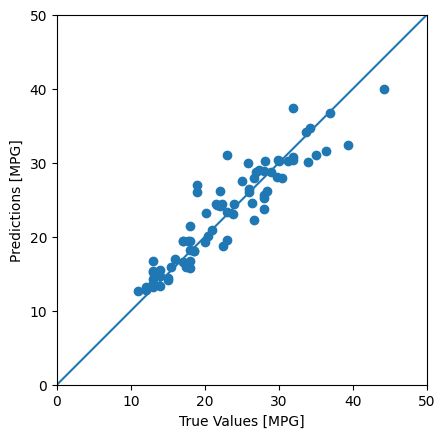

In [76]:
test_pred = dnn_model.predict(test_X).flatten()

plt.axes(aspect='equal')
plt.scatter(test_y, test_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims, lims)